In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import plotTools as ptools

In [2]:
f_qcd = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/outputs/bkg/bkg_2018_QCD_TuneCP5_PSWeights_SR_studies.coffea"
qcd = util.load(f_qcd)[0]

In [3]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in qcd.keys() if k not in cutflows]
qcd_samples = list(qcd['cutflow'].keys())
cuts = list(qcd['cutflow'][qcd_samples[0]].keys())
cutNames = {cname:ptools.getCut(qcd['cutDesc'][cname]) for cname in qcd['cutDesc'].keys()}

In [4]:
cut = "cut11" # last cut of base set

In [8]:
print("\n".join(histos))

sel_e1_pt
sel_e1_trkIso
sel_e1_trkRelIso
sel_e1_PFRelIso3
sel_e1_PFRelIso4
sel_e1_PFRelIso8
sel_e1_PFIso3
sel_e1_PFIso4
sel_e1_PFIso8
sel_e1_trkChi2
sel_e1_trkProb
sel_e1_dxy
sel_e1_dxySignif
sel_e1_angRes
sel_e2_pt
sel_e2_trkIso
sel_e2_trkRelIso
sel_e2_PFRelIso3
sel_e2_PFRelIso4
sel_e2_PFRelIso8
sel_e2_PFIso3
sel_e2_PFIso4
sel_e2_PFIso8
sel_e2_trkChi2
sel_e2_trkProb
sel_e2_dxy
sel_e2_dxySignif
sel_e2_angRes
sel_e1_pt_vs_trkIso
sel_e1_pt_vs_trkRelIso
sel_e1_pt_vs_chi2
sel_e1_chi2_vs_dxy
sel_e1_numHits_vs_trkChi2
sel_e1_numHits_vs_trkProb
sel_e2_pt_vs_trkIso
sel_e2_pt_vs_trkRelIso
sel_e2_pt_vs_chi2
sel_e2_chi2_vs_dxy
sel_e2_numHits_vs_trkChi2
sel_e2_numHits_vs_trkProb
sel_vtx_type
sel_vtx_sign
sel_vtx_dR
sel_vtx_dR_over_pT
sel_vtx_dR_over_m
sel_vtx_dR_over_pTm
sel_vtx_dR_over_mpT
sel_vtx_chi2
sel_vtx_prob
sel_vtx_vxy
sel_vtx_vxy_zoom
sel_vtx_vxy_zoomzoom
sel_vtx_vxySignif
sel_vtx_mass
sel_vtx_minDxy
sel_vtx_pt
sel_vtx_eta
sel_vtx_phi
sel_vtx_PFRelIso3
sel_vtx_PFRelIso3M
sel_vtx_PFRelIso

In [5]:
def plot(hname,xlim,rebin=1j,logy=False,scaley=5,xlabel=None):
    hb = qcd[hname][:,cut,::rebin]
    plt.figure(figsize=(8,6))
    sampAx = hb.axes[0]
    hb.plot1d(overlay='samp',yerr=False,density=False)
    if logy:
        plt.yscale('log')
    plt.xlim(xlim)
    ylo,yhi = plt.gca().get_ylim()
    plt.ylim([ylo,scaley*yhi])
    if xlabel:
        plt.xlabel(xlabel)
    ncol = min(sampAx.size//3 + sampAx.size % 3 ,3)
    plt.gca().legend(loc='upper center',bbox_to_anchor=(0.5,1),fontsize=7,ncol=ncol)
    plt.savefig(f"plots/histos/bkgOnly_{hname}.pdf")

# Electron Quality

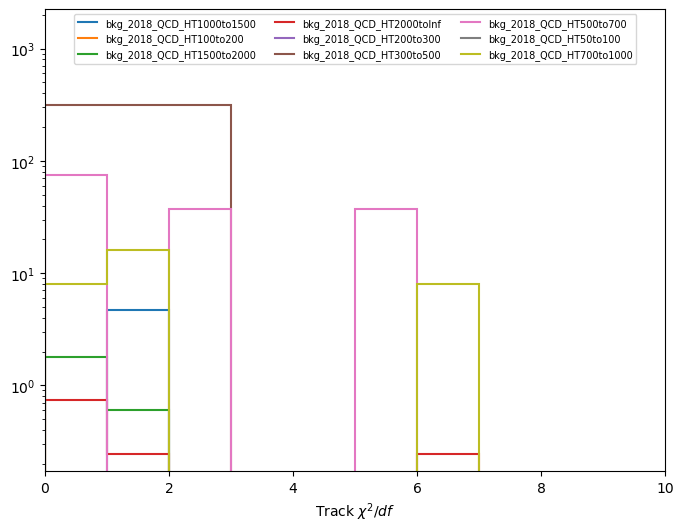

In [9]:
# electron 1 track chi2
plot("sel_e1_trkChi2",[0,10],logy=True,rebin=2j)

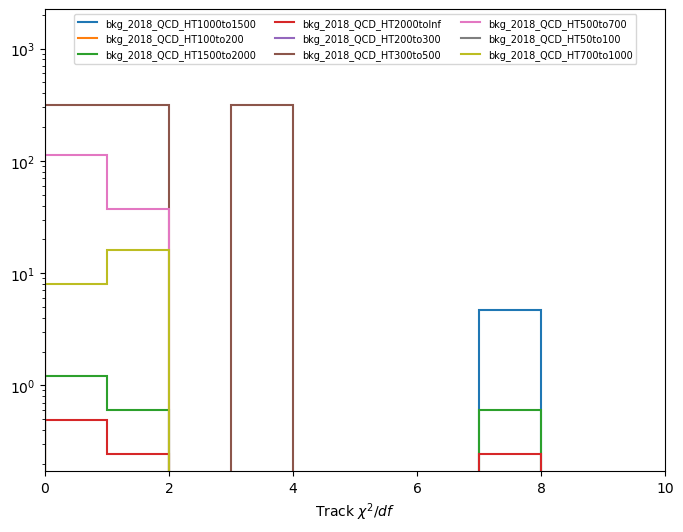

In [10]:
# electron 2 track chi2
plot("sel_e2_trkChi2",[0,10],logy=True,rebin=2j)

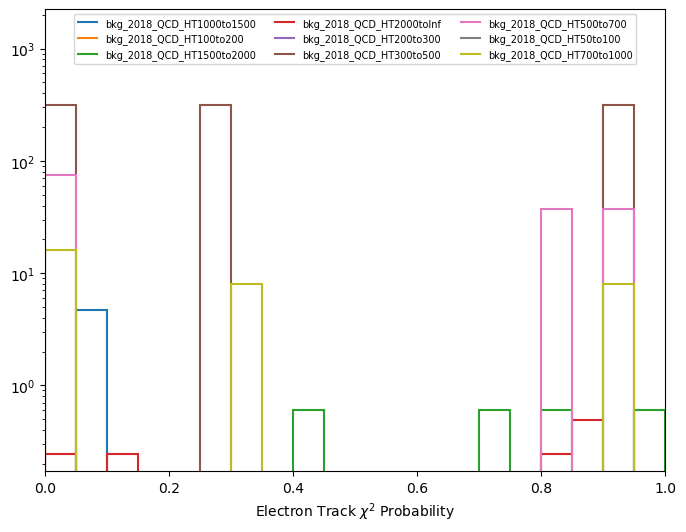

In [11]:
# electron 1 track probability
plot("sel_e1_trkProb",[0,1],logy=True,rebin=5j)

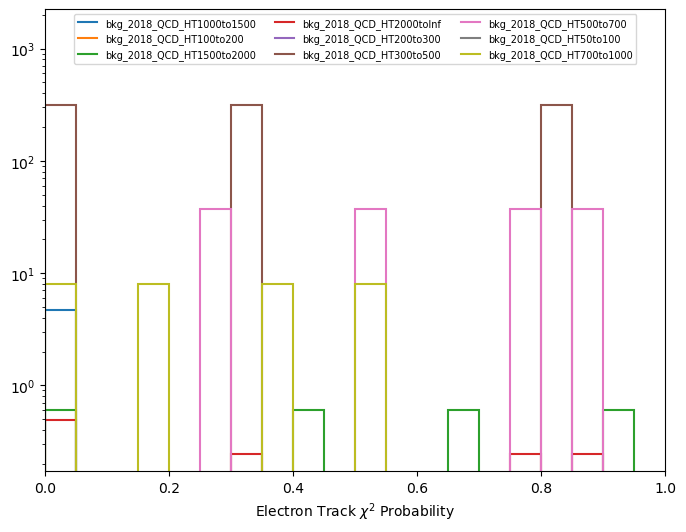

In [12]:
# electron 2 track probability
plot("sel_e2_trkProb",[0,1],logy=True,rebin=5j)

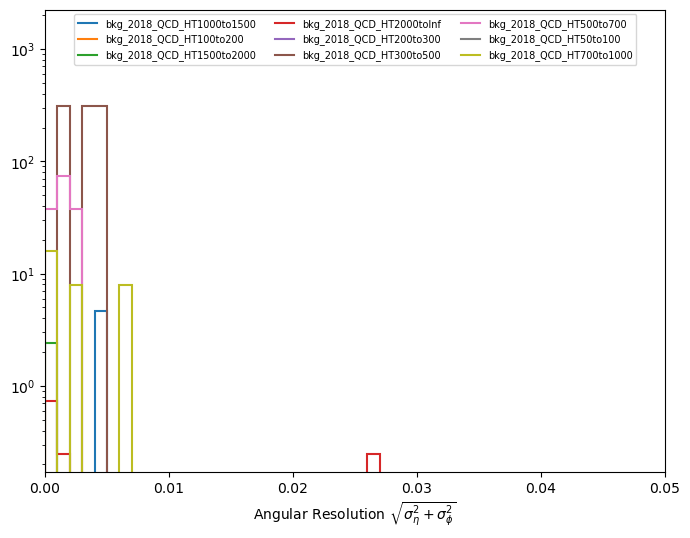

In [13]:
# electron 1 angular resolution
plot("sel_e1_angRes",[0,0.05],logy=True,rebin=1j)

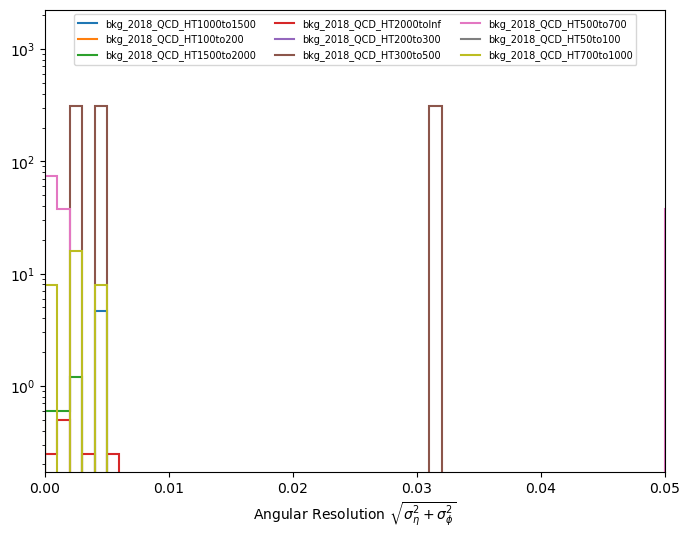

In [14]:
# electron 2 angular resolution
plot("sel_e2_angRes",[0,0.05],logy=True,rebin=1j)

# Displacement

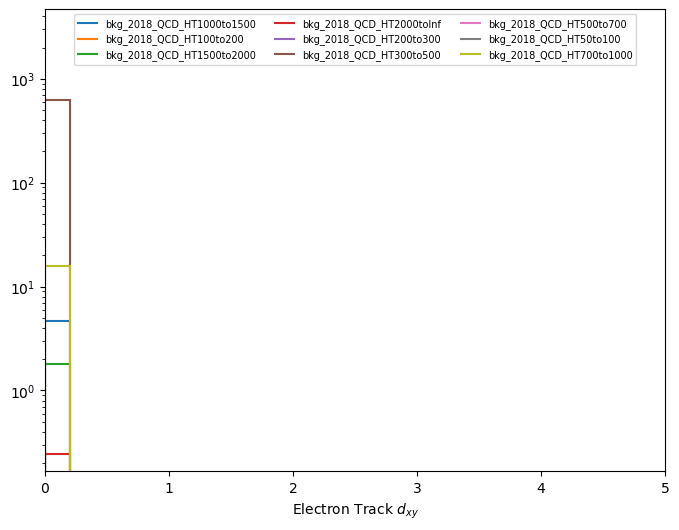

In [15]:
# electron 1 dxy
plot("sel_e1_dxy",[0,5],logy=True,rebin=2j)

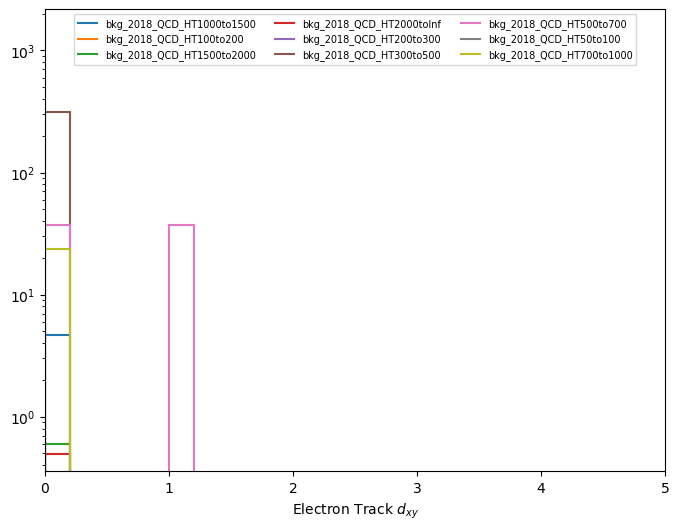

In [16]:
# electron 2 dxy
plot("sel_e2_dxy",[0,5],logy=True,rebin=2j)

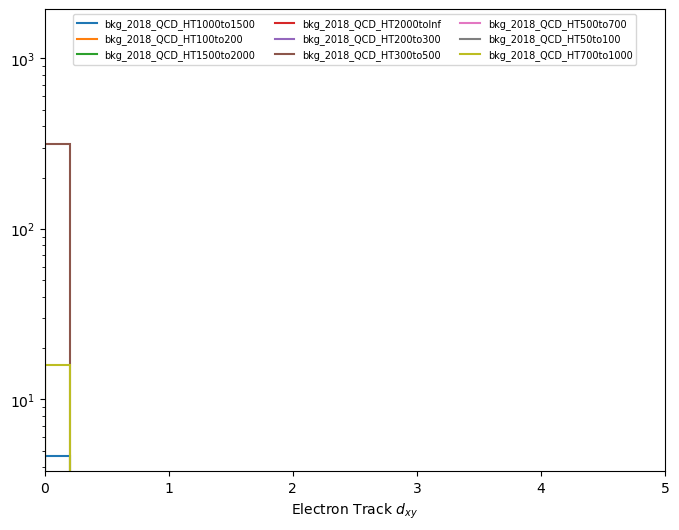

In [17]:
# vertex min(dxy1,dxy2)
plot("sel_vtx_minDxy",[0,5],logy=True,rebin=2j)

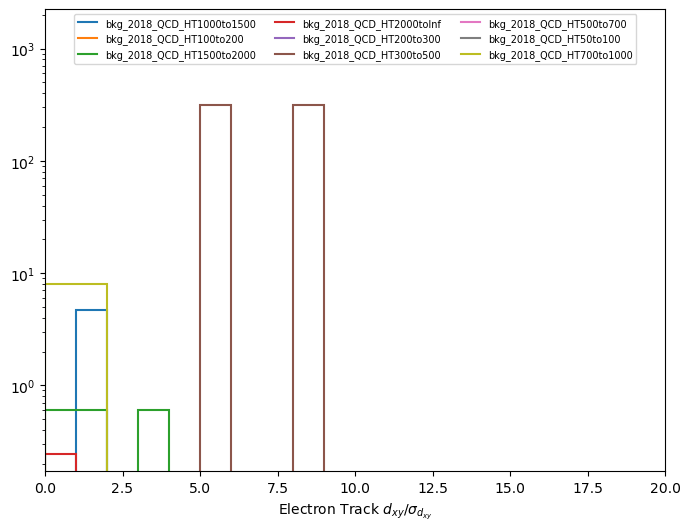

In [18]:
# electron 1 dxy significance
plot("sel_e1_dxySignif",[0,20],logy=True,rebin=1j)

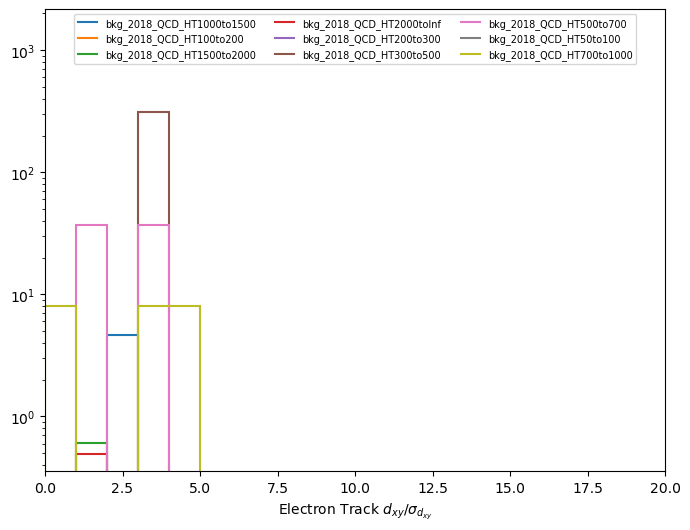

In [19]:
# electron 2 dxy significance
plot("sel_e2_dxySignif",[0,20],logy=True,rebin=1j)

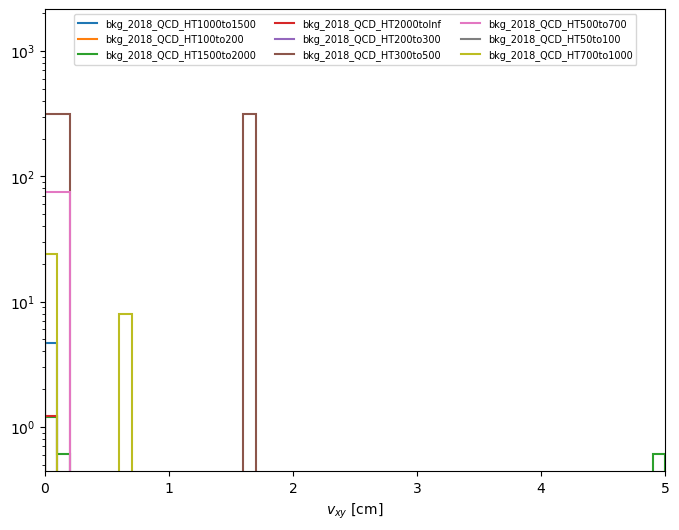

In [20]:
# vertex vxy
plot("sel_vtx_vxy",[0,5],logy=True,rebin=4j)

# Vertex Chi2

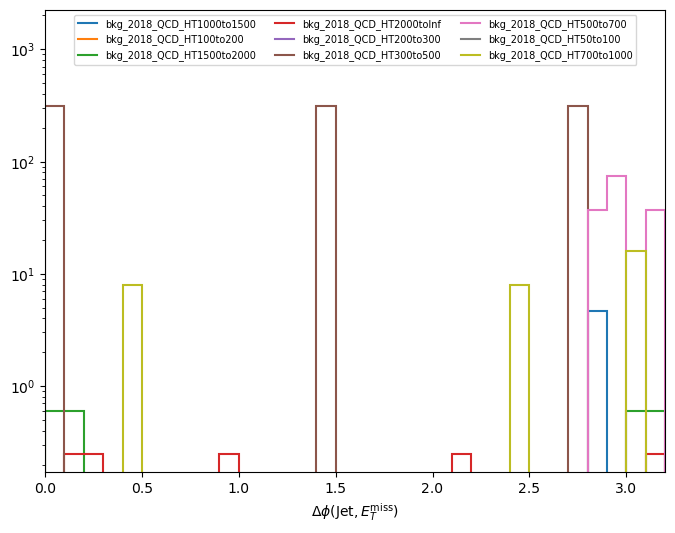

In [21]:
# vertex chi2
plot("sel_vtx_chi2",[0,20],logy=True,rebin=1j)

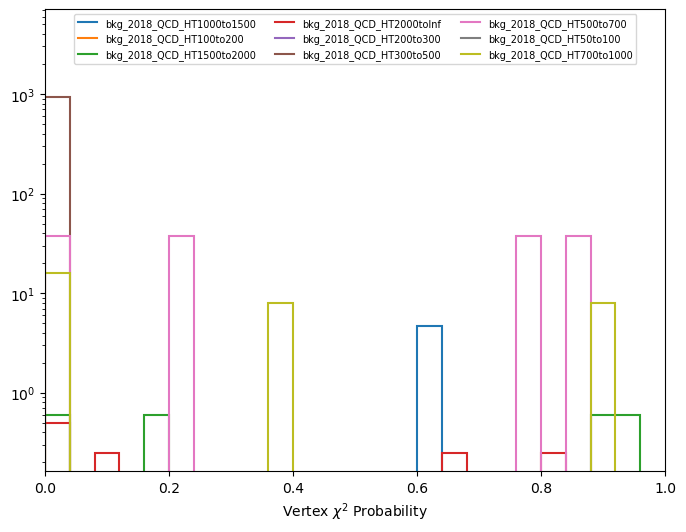

In [22]:
# vertex prob
plot("sel_vtx_prob",[0,1],logy=True,rebin=4j)

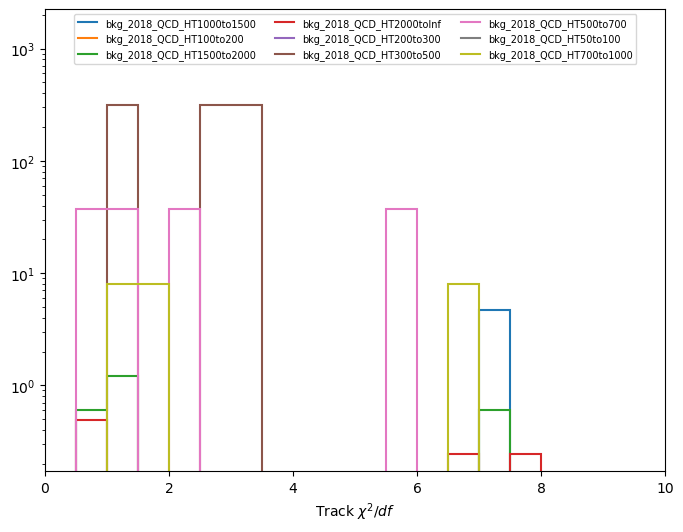

In [23]:
# vertex max(e1_chi2,e2_chi2)
plot("sel_vtx_max_chi2",[0,10],logy=True,rebin=1j)

# Vertex MET dPhi

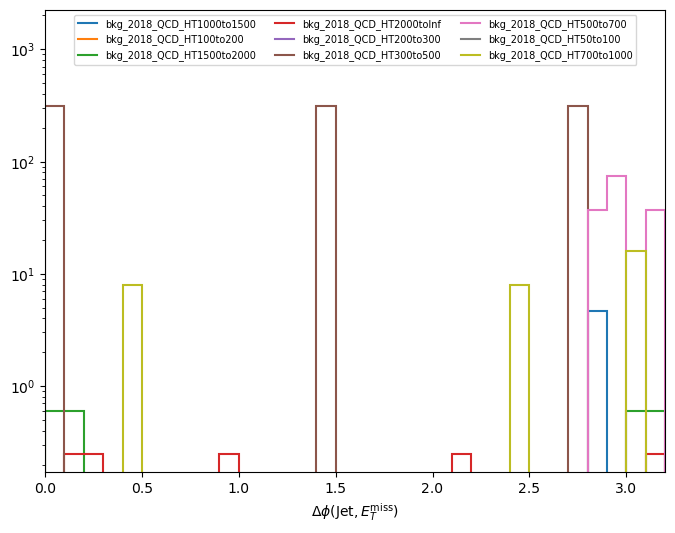

In [27]:
# vertex chi2
plot("vtx_met_dPhi",[0,3.2],logy=True,rebin=1j)

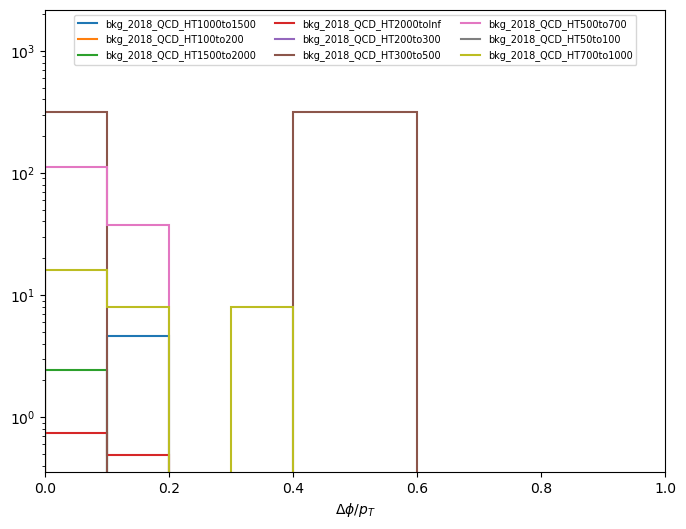

In [31]:
# vertex chi2
plot("sel_vtx_METdPhi_over_pT",[0,1],logy=True,rebin=1j)

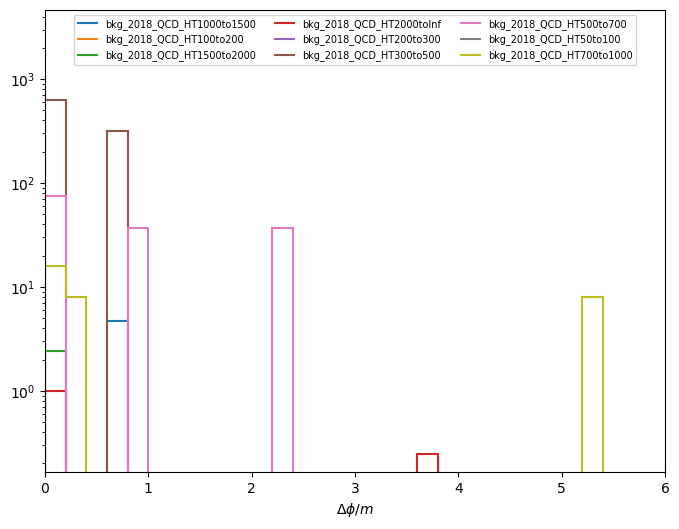

In [35]:
# vertex chi2
plot("sel_vtx_METdPhi_over_m",[0,6],logy=True,rebin=1j)

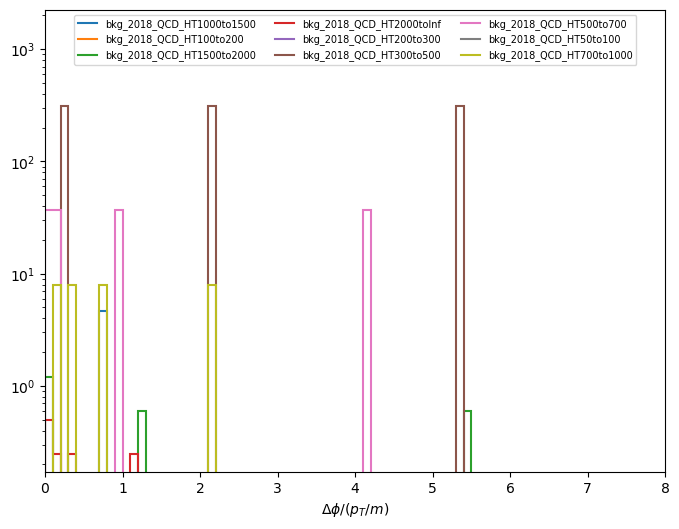

In [39]:
# vertex chi2
plot("sel_vtx_METdPhi_over_pTm",[0,8],logy=True,rebin=1j)

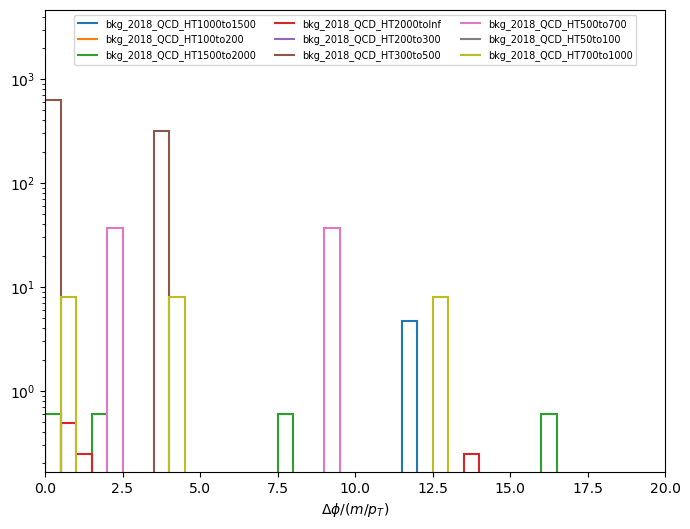

In [42]:
# vertex chi2
plot("sel_vtx_METdPhi_over_mpT",[0,20],logy=True,rebin=1j)

# Vertex dR plots

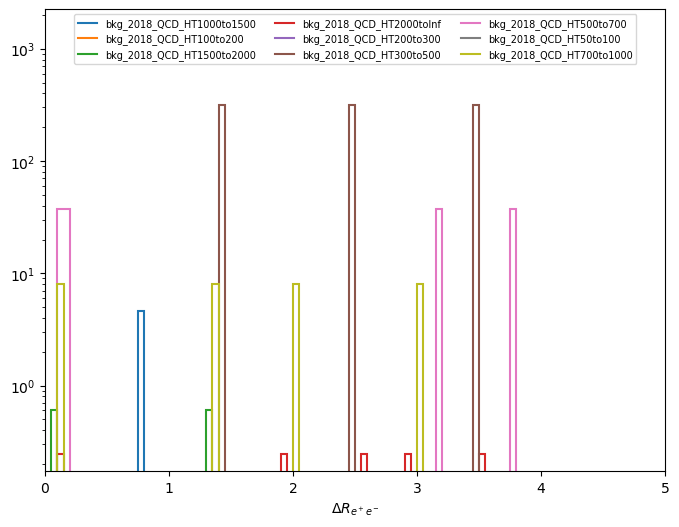

In [45]:
# vertex chi2
plot("sel_vtx_dR",[0,5],logy=True,rebin=1j)

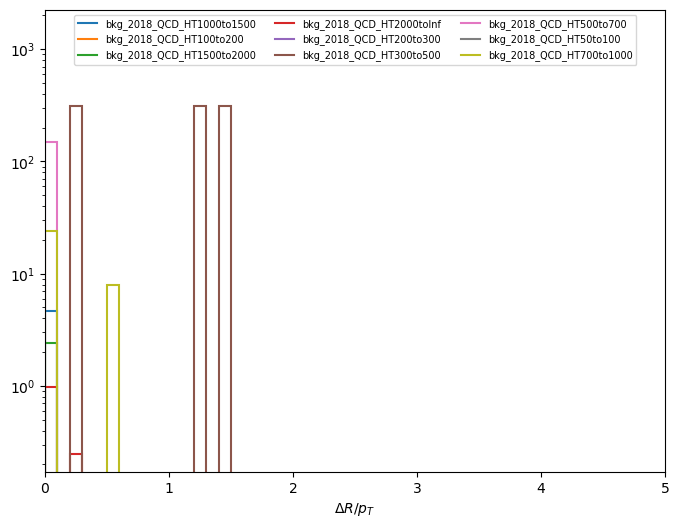

In [50]:
# vertex chi2
plot("sel_vtx_dR_over_pT",[0,5],logy=True,rebin=1j)

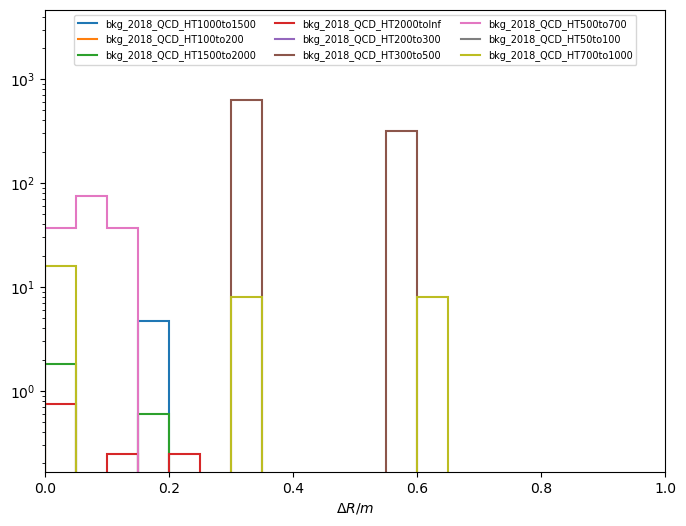

In [53]:
# vertex chi2
plot("sel_vtx_dR_over_m",[0,1],logy=True,rebin=1j)

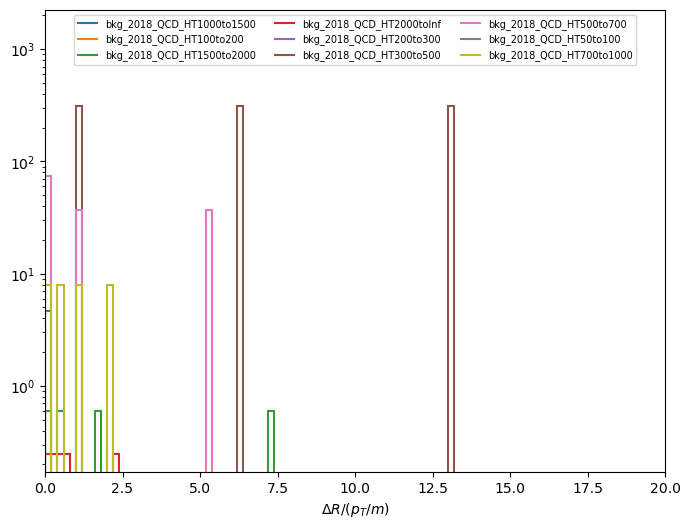

In [59]:
# vertex chi2
plot("sel_vtx_dR_over_pTm",[0,20],logy=True,rebin=1j)

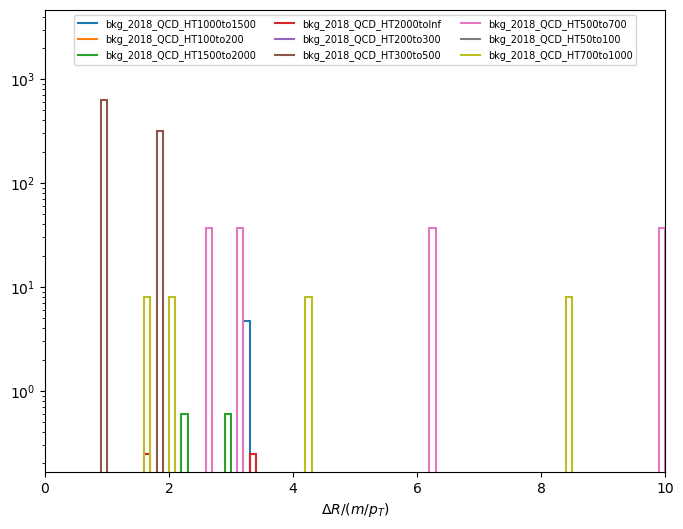

In [61]:
# vertex chi2
plot("sel_vtx_dR_over_mpT",[0,10],logy=True,rebin=1j)

# PF RelIso

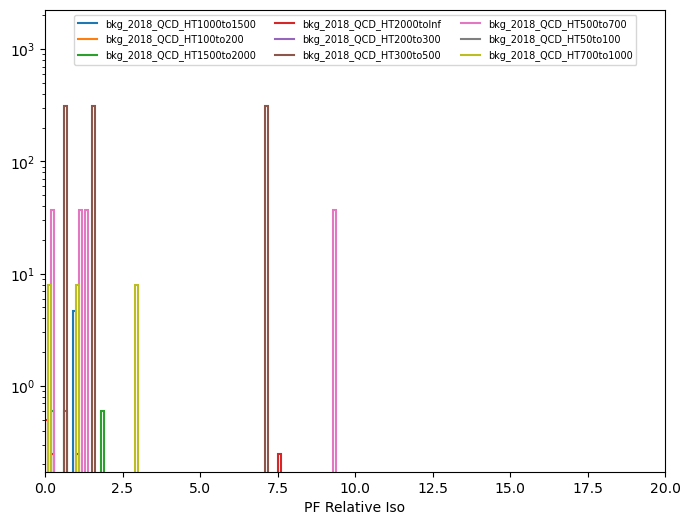

In [63]:
plot("sel_vtx_PFRelIso3",[0,10],logy=True,rebin=1j)

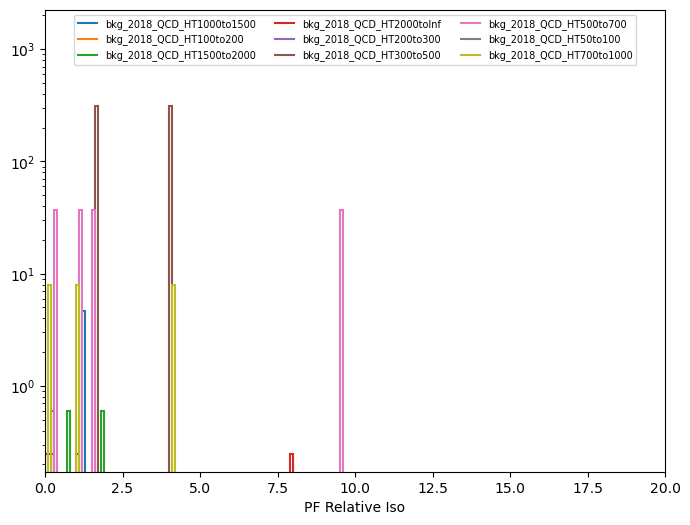

In [64]:
plot("sel_vtx_PFRelIso4",[0,20],logy=True,rebin=1j)

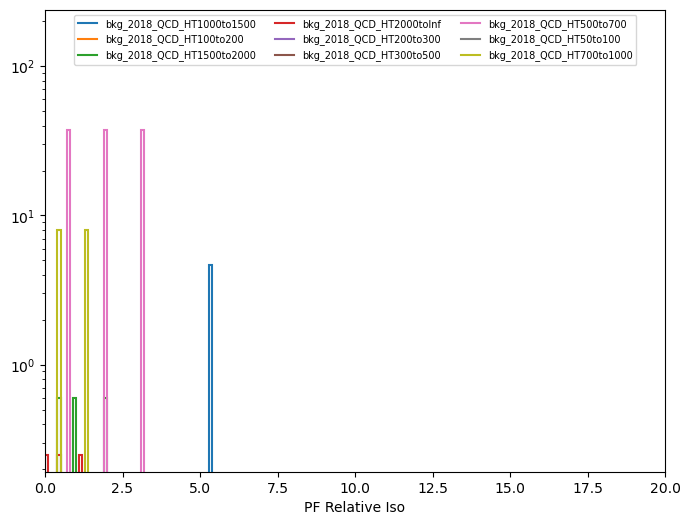

In [65]:
plot("sel_vtx_PFRelIso8",[0,20],logy=True,rebin=1j)

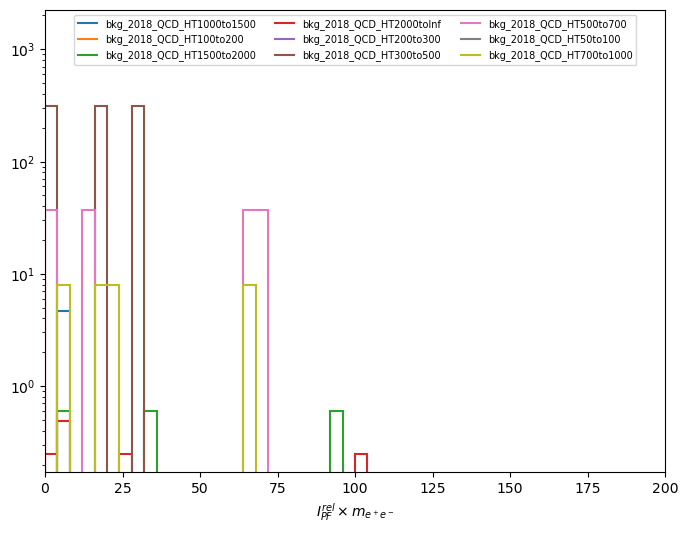

In [10]:
plot("sel_vtx_PFRelIso3M",[0,200],logy=True,rebin=2j)

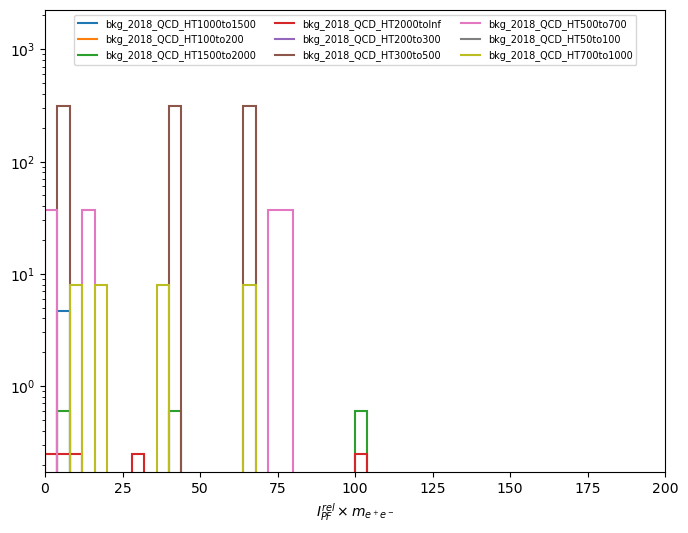

In [11]:
plot("sel_vtx_PFRelIso4M",[0,200],logy=True,rebin=2j)

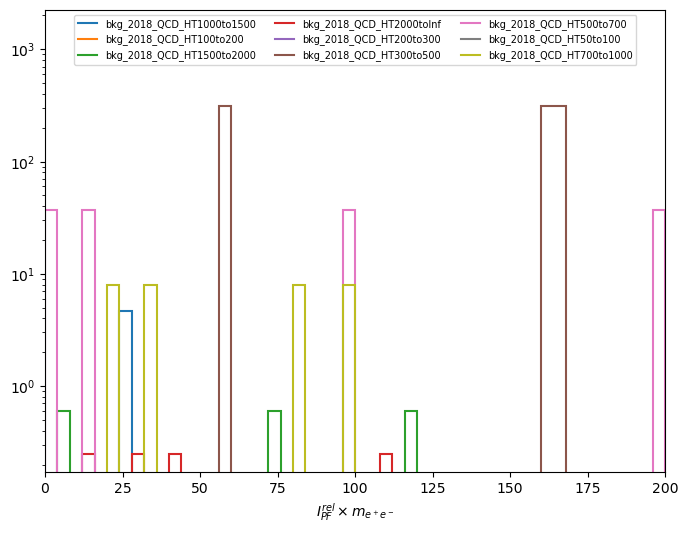

In [15]:
plot("sel_vtx_PFRelIso8M",[0,200],logy=True,rebin=2j)

# PF Iso

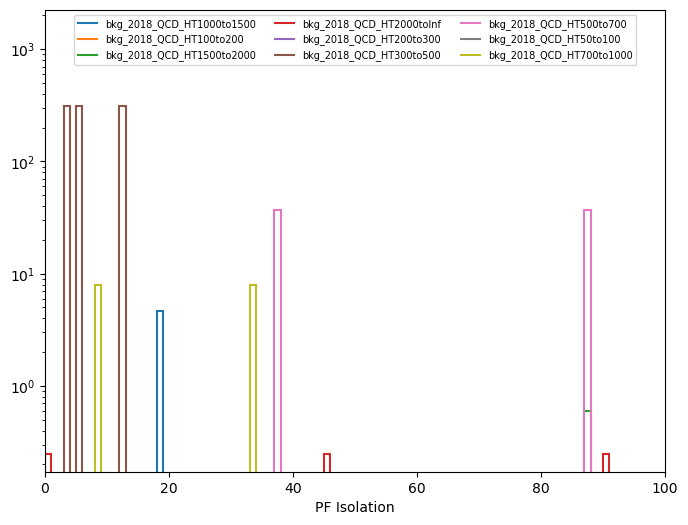

In [24]:
plot("sel_vtx_PFIso3",[0,100],logy=True,rebin=1j)

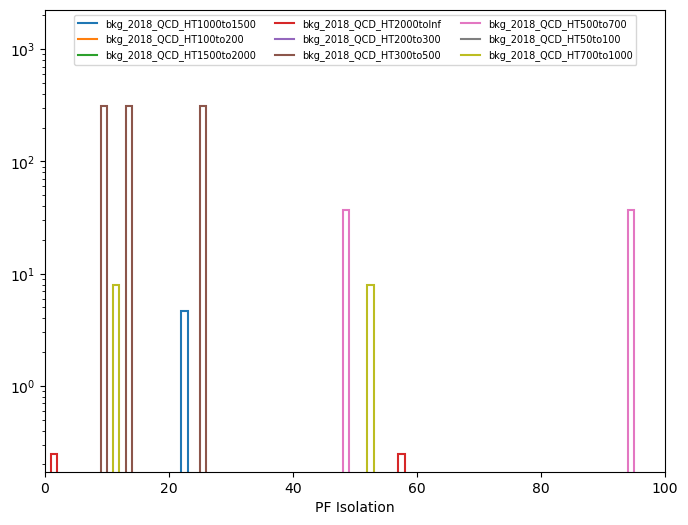

In [25]:
plot("sel_vtx_PFIso4",[0,100],logy=True,rebin=1j)

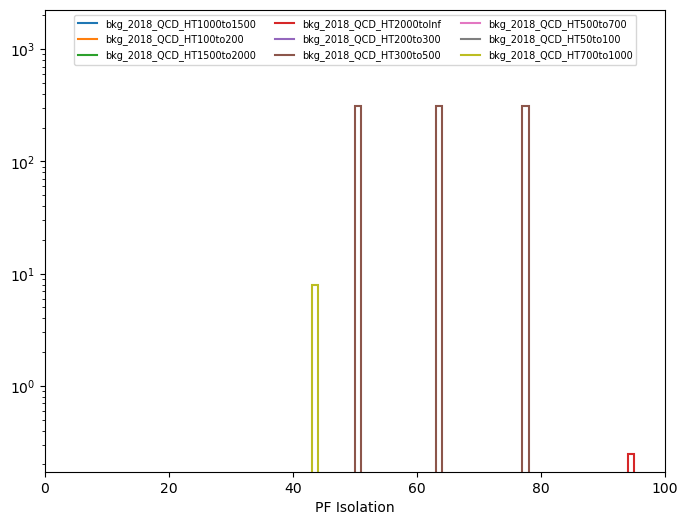

In [28]:
plot("sel_vtx_PFIso8",[0,100],logy=True,rebin=1j)

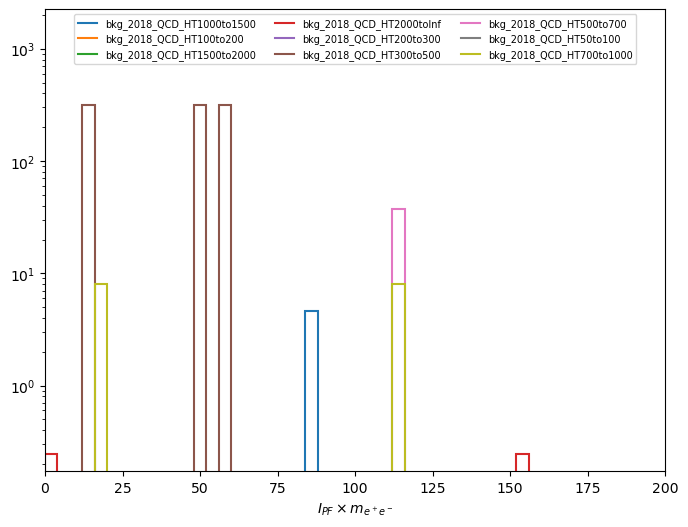

In [29]:
plot("sel_vtx_PFIso3M",[0,200],logy=True,rebin=2j)

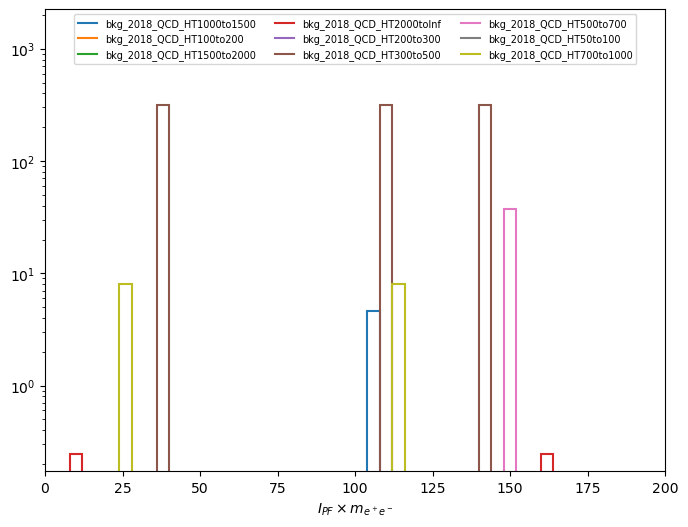

In [30]:
plot("sel_vtx_PFIso4M",[0,200],logy=True,rebin=2j)

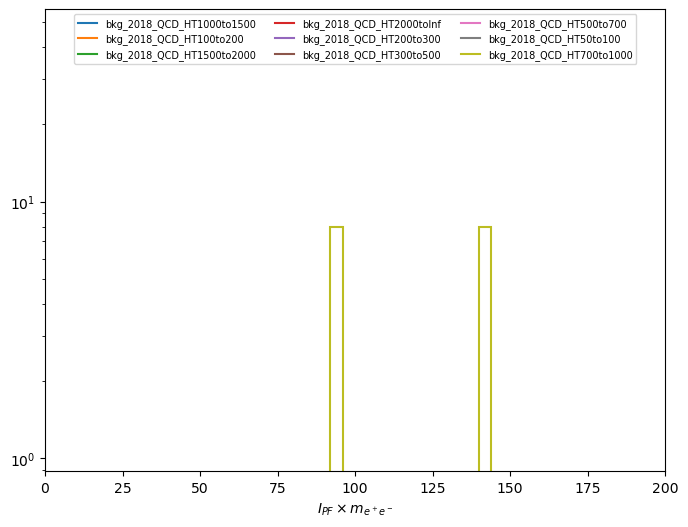

In [31]:
plot("sel_vtx_PFIso8M",[0,200],logy=True,rebin=2j)

# Misc plots

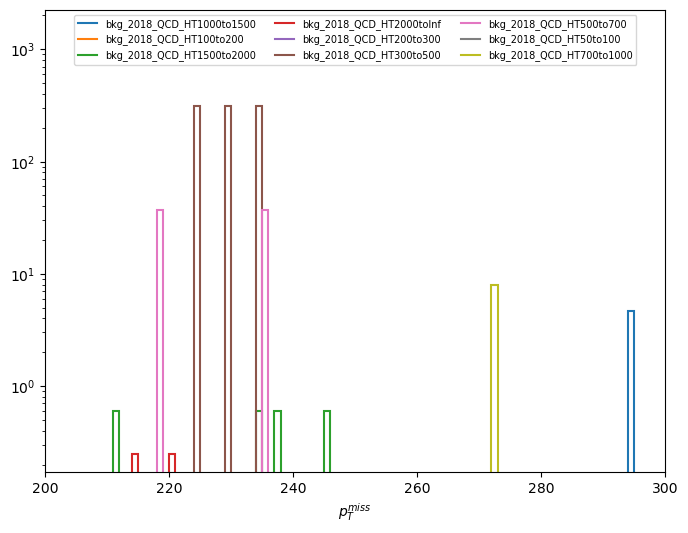

In [24]:
# vertex max(e1_chi2,e2_chi2)
plot("MET_pt",[200,300],logy=True,rebin=1j)

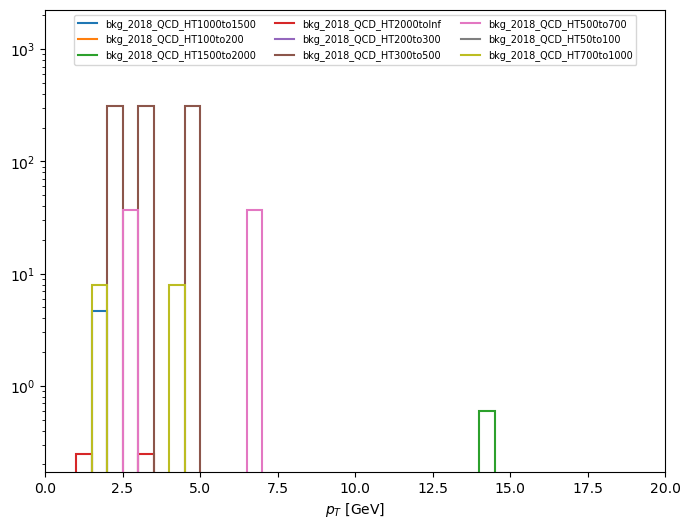

In [25]:
# vertex max(e1_chi2,e2_chi2)
plot("sel_e1_pt",[0,20],logy=True,rebin=1j)